# A particle in a one-dimensional finite square well potential

This notebook evaluates the allowed energies and wavefunctions for bound states of a particle confined to a finite square well potential.

## Introduction

Consider a particle of mass, $m$, that is moving in the $x$-direction and experiences a finite square potential of width, $L$, and height, $V_0$. We will assume that the energy of this particle, $E$, is less than $V_0$. Graphically, this potential has the form:

In [1]:
import numpy as np
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/edeprince3/super_coding_fun_time/main/square_well_potential/square_well_potential.png")

Mathematically, we define this potential in a piecewise way as

### Region I: 

$V(x) = V_0$, $x < 0$

### Region II: 

$V(x) = 0$, $0 \le x \le L$

### Region III: 

$V(x) = V_0$, $x > L$


# Part 1: Solving the Schrodinger equation directly

## Wavefunctions

Wavefunctions that satisfy the time-independent Schrodinger equation will also have a piecewise form, and we can determine the wavefunction by solving the Schrodinger equation in each region. We have

### Region I: 

$(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V_0) \psi_I(x) = E \psi_I(x)$

which has solutions of the form

$\psi_I(x) = C~{\rm exp}(\alpha x) + D~{\rm exp}(-\alpha x)$, $x < 0$

### Region II: 

$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} \psi_{II}(x) = E \psi_{II}(x)$

which has solutions of the form

$\psi_{II}(x) = A~{\rm cos}(\beta x) + B~{\rm sin}(\beta x)$, $0 \le x \le L$

and

### Region III: 

$(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V_0) \psi_{III}(x) = E \psi_{III}(x)$

which has solutions of the form

$\psi_{III}(x) = F~{\rm exp}(\alpha x) + G~{\rm exp}(-\alpha x)$, $x > l$

Above, $\alpha$ and $\beta$ are real numbers, defined by

$\alpha = ( 2 m [V_0 - E] / \hbar^2)^{1/2}$

$\beta = (2 m E / \hbar^2)^{1/2}$

## Boundary conditions

If we consider that the wave function should be finite in the limit that $x$ tends to $\pm \infty$, then we immediately find that the coefficients $D$ and $F$ must be zero.

As for the other unknown coefficients, we can determine these through the application of various boundary conditions:

1. The wavefunction should be continuous between regions I and II (at $x=0$). This condition leads us to 

    $C = A$
    

2. The derivative of the wavefunction should be continuous between regions I and II (at $x=0$). This condition leads us to 

    $B = [(V_0 - E)^{1/2} / (E)^{1/2}] A$
    

3. The wavefunction should be continuous between regions II and III (at $x=L$). This condition leads us to 

    $G = A ~[ {\rm cos}(\beta L) + \alpha~ / \beta ~{\rm sin}(\beta L) ] ~{\rm exp}(\alpha L)$
    

4. The derivative of the wavefunction should be continuous between regions II and III (at $x=L$). This condition leads us to a trancendental equation for the energy: 

    ${\rm tan}[(2mE/\hbar^2)^{1/2} L] = 2 (V_0-E)(E)^{1/2}/(2 E-V_0)$
    

Lastly, the coefficent A can be determined by normalization.




## Procedure for visualizing the allowable wavefunctions

In order to determine the allowable energies and corresponding wavefunctions for the particle in a finite square well potential, we will follow the following steps:

1. We should specify parameters $m$, $L$, and $V_0$ that define our problem. 


2. We should plot the trancendental equation for the energy to (a) determine how many bound states we have and (b) to obtain reasonable guesses for these energies.


3. We should numerically solve the trancendental equation using some functionality in the scipy package.


4. Once we have the allowable energies, we can evaluate the corresponding wavefunction parameters defined above.


5. Given the wave function parameters, we can visualize the wavefunction or its square modulus.

In [2]:
# step 1: specify the parameters, in atomic units (hbar = 1):

m = 1.0
V0 = 10.0
L = 1.0

/var/folders/p7/jsnw6xvd0bx93ym71r58v0nm0000gn/T/ipykernel_11243/3949175432.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  rhs.append( 2.0 * np.sqrt(V0 - E[i]) * np.sqrt(E[i]) / ( 2.0 * E[i] - V0) )


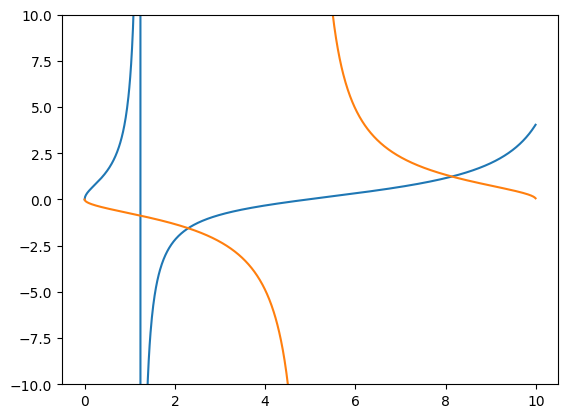

In [3]:
# step 2: plot the trancendental equation for the energy

import numpy as np
import matplotlib.pyplot as plt

# energies should be less than V0 (we're looking at bound states)
dE = 0.01
E = np.arange(0, V0, dE)

# LHS = tan[sqrt(2mE/hbar^2)*L]
# RHS = 2*sqrt(V0-E)sqrt(E)/(2*E-V0)
lhs = []
rhs = []

for i in range(len(E)):
    lhs.append( np.tan(np.sqrt(2.0 * m * E[i]) * L) )
    rhs.append( 2.0 * np.sqrt(V0 - E[i]) * np.sqrt(E[i]) / ( 2.0 * E[i] - V0) )

plt.plot(E, lhs) 
plt.plot(E, rhs)
plt.ylim(-10,10)
ax = plt.gca()

plt.show()

From above, we can see that there are two allowable energies (points at which the blue and orange curves cross, not counting the divergence in the blue curve). These energies look like they are roughly 2.5 and 8.5 (atomic units). We now need to numerically solve the trancendental equation. We're going to use the function:

    scipy.optimize.fsolve
    
for this purpose. We will have to pass some objective function $f(E) = 0$ for which this function will find the optimal $E$ value(s).

In [4]:
def allowable_energies(E, *data):
    
    """
    
    function defining allowable energies:
    
    tan[sqrt(2mE/hbar^2)*L] - 2*sqrt(V0-E)sqrt(E)/(2*E-V0) = 0
    
    :param E: the energy
    :param data: m, V0, and L
    
    :return value: the function value
    
    """
    
    m, V0, L = data
    
    return np.tan(np.sqrt(2.0 * m * E) * L) - 2.0 * np.sqrt(V0 - E) * np.sqrt(E) / ( 2.0 * E - V0)

Now, we're ready to solve for the allowable energies.

In [5]:
# step 3: solve for allowable energies, with initial guess informed by plot above

import scipy
E = scipy.optimize.fsolve(func = allowable_energies, x0 = [2.5, 8.0], args = (m, V0, L) )

print(E)

[2.29499075 8.13714776]


Given the allowable energies, we can calculate the corresponding wavefunction parameters. Since all of the parameters can be expressed in terms of $A$, we start with the choice $A = 1$, but we'll rescale all of the coefficients such that the wavefunction is normalized. 

In [6]:
# step 4. evaluate wavefunction parameters for each of the allowable energy levels

alpha = np.sqrt( 2.0 * m * (V0 - E) )
beta = np.sqrt( 2.0 * m * E )
    
A = 1 # we'll normalize, but start with A = 1
C = A
B = np.sqrt(V0 - E) / np.sqrt(E) * A
G = A * ( np.cos(beta * L) + alpha / beta * np.sin(beta * L) ) * np.exp(alpha * L)

Now, we can scale the coefficients ($A$, $B$, $C$, and $G$) such that the wavefunction is normalized, i.e., such that

$\int_{-\infty}^{\infty} |\psi(x)|^2 dx = 1$

To normalize the wave function, we should scale $\psi(x)$ such that

$\psi(x) \to \psi(x) / \left ( \int_{-\infty}^{\infty} |\psi(x)|^2 dx \right )^{1/2}$

and will need to evaluate the integral in a piecewise manner, as

$\int_{-\infty}^{\infty} |\psi(x)|^2 dx = \int_{-\infty}^{0} |\psi_I(x)|^2 dx + \int_{0}^{L} |\psi(x)_{II}|^2 dx + \int_{L}^{\infty} |\psi(x)_{III}|^2 dx$

Each of these integrals can be evaluated analytically as

$\int_{-\infty}^{0} |\psi_I(x)|^2 dx = |A|^2 / ( 2 \alpha)$

$\int_{0}^{L} |\psi(x)_{II}|^2 dx = (2 \beta L (A^2 + B^2) + (A - B) (A + B) {\rm sin}(2 \beta L) - 2 A B {\rm cos}(2 \beta L) + 2 A B)/(4 \beta)$

and

$\int_{L}^{\infty} |\psi(x)_{III}|^2 dx = {\rm exp}(-2 \alpha L) / (2 \alpha)$


In [7]:
# step 4 continued. normalize the wave function
    
nrm  = A*A / (2.0 * alpha) 
nrm += (2 * beta * L * (A**2 + B**2) + (A - B)*(A + B)*np.sin(2.0 * beta * L) - 2.0 * A * B * np.cos(2 * beta * L) + 2.0 * A * B)/(4.0 * beta)
nrm += G*G * np.exp(-2.0 * alpha * L) / (2.0 * alpha)
    
nrm = 1.0 / np.sqrt(nrm)
    
A *= nrm
B *= nrm
C *= nrm
G *= nrm

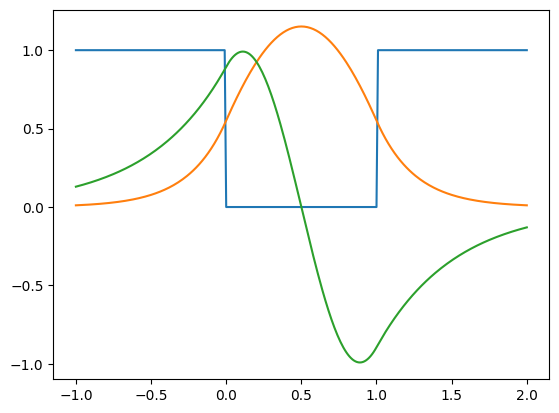

In [8]:
# step 5. plot the wavefunction (and the shape of the potential)

dx = 0.01
left = np.arange(-1, 0, dx)
inside = np.arange(0, L + dx, dx)
right = np.arange(L+dx, 2 + dx, dx)

V = []
psi = []
psi2 = []
x = []

# psi(x) = C exp(alpha x), x < 0
for i in range(len(left)):
    V.append(1.0)
    x.append(left[i])
    val = C * np.exp(alpha * left[i])
    psi.append(val)
    psi2.append(val*val)

# psi(x) = A cos(beta x) + B sin(beta x), 0 < x < L
for i in range(len(inside)):
    V.append(0.0)
    x.append(inside[i])
    val = A * np.cos(beta * inside[i]) + B * np.sin(beta * inside[i]) 
    psi.append(val)
    psi2.append(val*val)
    
# psi(x) = G exp(-alpha x), x > L
for i in range(len(right)):
    V.append(1.0)
    x.append(right[i])
    val = G * np.exp(-alpha * right[i])
    psi.append(val)
    psi2.append(val*val)

plt.plot(x, V)
plt.plot(x, psi) 
ax = plt.gca()

plt.show()

## Now what?

Now, you should re-run this notebook with different values for the mass ($m$), the width of the well ($L$), and the height of the potential outside of the well ($V_0$). Ask yourself the following questions:

1. Does increasing $V_0$ increase or decrease the number of bound states?


2. Does increasing $L$ increase or decrease the number of bound states?


3. Does increasing $m$ increase or decrease the number of bound states?


4. For a given $m$, $L$, and $V_0$, which bound states have the highest / lowest tunneling probability (the probability of finding the particle outside of the well)? Can you rationalize this result?


5. Can the number of bound states ever be zero, for certain combinations of $m$, $L$, and $V_0$?


# Part 2: Solving the Schrodinger equation variationally

In this part, we solve the Schrodinger equation variationally. We first define a set of basis functions, $\{f_i\}$, with which we will expand our trial function:

$\vert \phi \rangle = \sum_i c_i \vert f_i \rangle $

Now, we make the variational integral

$W = \frac{ \langle \phi \vert \hat{H} \vert \phi \rangle }{\langle \phi \vert \phi \rangle} $

stationary with respect to variations in the expansion coefficients, $\{c_i\}$, <i>i.e.</i>, 

$\frac{\partial W}{\partial c_i} = 0$

This stationary condition leads to a linear system of equations

$\forall i: \sum_j (H_{ij} - E S_{ij}) c_j = 0,$

which is equivalent to the generalized eigenvalue problem

$ H c = E cS$

Here, the matrix representation of the Hamiltonian is given by

$H_{ij} = \langle f_i \vert \hat{H} \vert f_j \rangle$

and the overlap matrix is defined as

$S_{ij} = \langle f_i \vert f_j \rangle$

For the finite square well potential problem, we will choose $\{f_i\}$ to be particle-in-a-box (<i>infinite</i> square well potential) wave functions, where the box is defined with a length $L' > L$. The reason for this choice is that the wave functions for finite square well potential should spill outside of the box (see above), whereas particle-in-a-box wave functions will go to zero at $L'$.

In [9]:
# PIB box width
Lprime = 40 * L

# the number of basis functions
nbf = 400

# left side of box:
minx = 0.5 * L - 0.5 * Lprime

# right side of box:
maxx = 0.5 * L + 0.5 * Lprime

dx = 0.01
left = np.arange(minx, 0, dx)
inside = np.arange(0, L + dx, dx)
right = np.arange(L+dx, maxx + dx, dx)

# redefine V and wave functions on this interval
V = []
psi = []
psi2 = []
x = []
Vx = []

# psi(x) = C exp(alpha x), x < 0
for i in range(len(left)):
    V.append(1.0)
    Vx.append(V0)
    x.append(left[i])
    val = C * np.exp(alpha * left[i])
    psi.append(val)
    psi2.append(val*val)

# psi(x) = A cos(beta x) + B sin(beta x), 0 < x < L
for i in range(len(inside)):
    V.append(0.0)
    Vx.append(0.0)
    x.append(inside[i])
    val = A * np.cos(beta * inside[i]) + B * np.sin(beta * inside[i]) 
    psi.append(val)
    psi2.append(val*val)
    
# psi(x) = G exp(-alpha x), x > L
for i in range(len(right)):
    V.append(1.0)
    Vx.append(V0)
    x.append(right[i])
    val = G * np.exp(-alpha * right[i])
    psi.append(val)
    psi2.append(val*val)
    
# define basis functions on this interval

f = []

for n in range (1, nbf+1):
    myf = []
    
    myx = 0.0
    for i in range(len(left)):
        myf.append(np.sqrt(2.0/Lprime) * np.sin(n * np.pi * myx / Lprime))
        myx += dx
        
    for i in range(len(inside)):
        myf.append(np.sqrt(2.0/Lprime) * np.sin(n * np.pi * myx / Lprime))
        myx += dx
        
    for i in range(len(right)):
        myf.append(np.sqrt(2.0/Lprime) * np.sin(n * np.pi * myx / Lprime))
        myx += dx
        
    f.append(myf)


Having defined our basis functions, we should evaluate the Hamiltonian and overlap matrix elements. We can use numpy's trapz function to perform the necessary integrals.

In [10]:
H = np.zeros( [nbf, nbf], dtype='float64')
S = np.zeros( [nbf, nbf], dtype='float64')

f = np.asarray(f)

for i in range (0, nbf):
    for j in range (0, nbf):
        
        # kinetic energy term: <fi|T|fj> 
        # with T|fn> 1/(2m) * n^2pi^2/Lprime^2 sqrt(2/Lprime)|fn>
        kinetic = 1.0 / 2.0 * (j+1)**2 * np.pi**2 / Lprime**2 * f[i] * f[j]
        
        
        # potential energy term: <fi|V|fj>
        potential = f[i] * np.asarray(Vx) * f[j]       

        H[i][j] = np.trapz( kinetic + potential, x = x )
        
        S[i][j] = np.trapz( f[i] * f[j], x = x)
        

We now can use scipy.linalg.eig to solve the generalized eigenvalue problem

$H c = E c S$

In [11]:
from scipy import linalg

w, c = linalg.eig(H, S)

ind = np.argsort(w)
w = w[ind]
c = c[:,ind]

print(w[0], w[1])

(2.2650926970278404+0j) (8.058232057714992+0j)


Now, let's visualize the variationally optimized wave functions. We'll need to contract the eigenvectors with the basis functions as 

$\phi^{(i)} = \sum_j c^{(i)}_{j} f_j$

which can be achieved using numpy's einsum function.

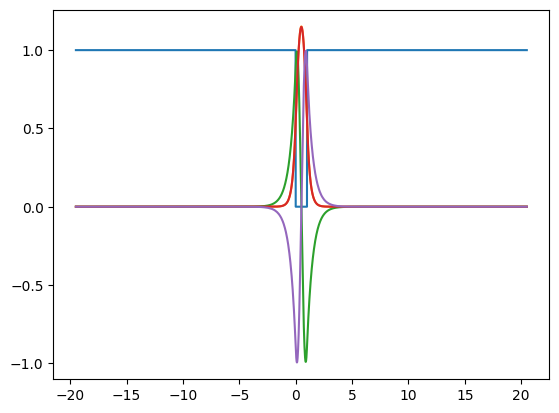

In [12]:
phi = np.einsum('ji,jk->ik', c, f)

plt.plot(x, V)
plt.plot(x, psi) 
plt.plot(x, -phi[0])
plt.plot(x, -phi[1])
ax = plt.gca()

plt.show()

## Now what?

Now, you should re-run this part of the notebook with different values for $L'$ and different numbers of basis functions. 

1. For a fixed basis set size, does increasing $L'$ increase or decrease the quality of your solution? You should calculate both the error in the energy and the error in the probability distribution, $|\phi|^2$.


2. For a fixed $L'$, does increasing the size of the basis increase or decrease the quality of your solution? You should calculate both the error in the energy and the error in the probability distribution, $|\phi|^2$.
